# Churn Drivers Analysis

## Analysis Overview
This analysis aims to visualize and examine the impact of various factors on customer churn, defined as the percentage of customers who discontinue using a service.

### Factors Under Investigation
#### 1. Service Offerings

We will explore the following questions:

1. **Internet Service**: Are customers with internet services less likely to churn? Which internet type has the lowest churn rate?

2. **Payment Methods**: What are the churn rates for Bank Withdrawal, Credit Card, and Mailed Check?

3. **Contract Types**: How do churn rates differ among Month-to-Month, One Year, and Two Year contracts?

4. **Additional Services**: Do customers using 'Online Backup', 'Premium Tech Support', and 'Unlimited Data' services experience lower churn rates?

#### 2. Demographic Characteristics

We will address these questions:

1. **Age Groups**: Which age group (Under 30, 30-64, Over 64) has the highest churn rate?

2. **Marital Status**: Are married individuals less likely to churn compared to singles?

### Purpose
The insights gained from this analysis will help identify areas for improving customer retention strategies.



## Import data

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.proportion import proportions_ztest
warnings.filterwarnings('ignore', category=DeprecationWarning)

We will use the dataset "Combined_Data.csv", a unified dataset generated from the "ML_Models_Development.ipynb" notebook.

In [471]:
# Import the datasets
data = pd.read_csv('Data/Combined_Data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         7043 non-null   int64  
 1   Status ID                          7043 non-null   object 
 2   Customer ID                        7043 non-null   object 
 3   Count_x                            7043 non-null   int64  
 4   Quarter_x                          7043 non-null   object 
 5   Satisfaction Score                 7043 non-null   int64  
 6   Customer Status                    7043 non-null   object 
 7   Churn Label                        7043 non-null   object 
 8   Churn Value                        7043 non-null   int64  
 9   Churn Score                        7043 non-null   int64  
 10  CLTV                               7043 non-null   int64  
 11  Churn Category                     1869 non-null   objec

These data cleaning tasks are needed before proceeding with out analysis:
1. Impute null values in the column "Internet Type" with the string "No Internet Service".
2. Using the columns "Under 30" and "Senior Citizen", create the "Age Group" which segments customers into three distinct groups based on age.
3. Rename the column "Married" as "Marital Status", replace the value "Yes" with "Married", and "No" with "Single" to enhance readability. We also would like to rename the column "Contract" to "Contract Type"

In [472]:
# Replace null value in the column "Internet Type" with "No Internet Service"
data.loc[data["Internet Type"].isnull(), "Internet Type"] = "No Internet Service"

In [473]:
# Add the new column "Age Group" to the dataframe, with all null values assignment
data["Age Group"] = None

# Assign "Under 30" to customers identified as under 30
data.loc[data["Under 30"]=="Yes", "Age Group"] = "Under 30"

# Assign "Over 65" to customers identified as senior citizens
data.loc[data["Senior Citizen"]=="Yes", "Age Group"] = "Over 65"

# Impute the remaining null values with the string "30-64"
data.loc[data["Age Group"].isnull(), "Age Group"] = "30-64"

In [474]:
 # Rename the column "Married" as "Marital Status"
data = data.rename(columns={'Married': 'Marital Status'})

# Replace the value "Yes" with "Married", and "No" with "Single"
data['Marital Status'] = data['Marital Status'].map({'Yes': 'Married', 'No': 'Single'})

 # Rename the column "Married" as "Marital Status"
data = data.rename(columns={'Contract': 'Contract'})

## Churn Driver: Service Offerings

This section elaborates how different service offerings contribute to the churn likelihood of customers.

First we define a function that return the churn rate in percentage.

In [475]:
def get_churn_rate(category: str):
    """ 
    Calculates the churn rate as a percentage for a given category.

    The churn rate is determined by the proportion of customers labeled as "Yes" 
    in the 'Churn Label' column, relative to the total number of customers 
    in the specified category.

    Parameters:
        category (str): A column from the DataFrame representing a categorical feature 
                        to group by (e.g., 'Gender', 'Contract Type', etc.).

    Returns:
        float: The churn rate expressed as a percentage, rounded to two decimal places.
    """
    
    return (category['Churn Label'].value_counts()["Yes"] * 100 / len(category)).round(1)


Then we define a function that can visualize the churn rate for each category of a service using a bar chart. We also print out the exact churn rate for better transparency and precision.

In [476]:
def churn_rate_viz(category):
    """ 
    Visualizes the churn rate as a bar chart for a specified categorical feature.

    This function groups the data by the specified category and calculates the churn rate 
    for each group using the `get_churn_rate` function. It then creates a bar chart to 
    visually represent the churn rates.

    Parameters:
        category (str): A column name from the DataFrame representing a categorical feature 
                        (e.g., 'Contract Type', 'Internet Service', etc.) to group by.

    Returns:
       None: The function displays a bar chart showing the churn rate for each category 
              and prints the churn rates in the console.

    Example:
        >>> churn_rate_viz('Contract Type')
    """
    # Calculate churn rate
    grouping = data.groupby(category).apply(get_churn_rate).sort_values(ascending=False)
    
    # Calculate average satisfaction score
    avg_satisfaction = data.groupby(category)['Satisfaction Score'].mean().loc[grouping.index].round(1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart for churn rate
    ax1.bar(x=grouping.index, height=grouping.values, color='orange', width=0.65)
    ax1.set_ylabel('Churn rate (%)')
    ax1.set_title("Churn rate (%) by " + category)
    
    # Bar chart for average satisfaction score
    ax2.bar(x=avg_satisfaction.index, height=avg_satisfaction.values, color='cornflowerblue', width=0.65)
    ax2.set_ylabel('Avg. Satisfaction Score')
    ax2.set_title("Avg Satisfaction Score by " + category)

    # Printing out the results
    print("Churn Rate by", category)
    print(grouping)
    print()
    print("Satisfaction Score by", category)
    print(avg_satisfaction)

### Question 1: How Does Internet Type Affect Churn Rates Among Fiber Optic, Cable, DSL, and No Internet Service?

##### a. Exploratory Data Analysis

Churn Rate by Internet Type
Internet Type
Fiber Optic            40.7
Cable                  25.7
DSL                    18.6
No Internet Service     7.4
dtype: float64

Satisfaction Score by Internet Type
Internet Type
Fiber Optic            2.9
Cable                  3.2
DSL                    3.3
No Internet Service    3.8
Name: Satisfaction Score, dtype: float64


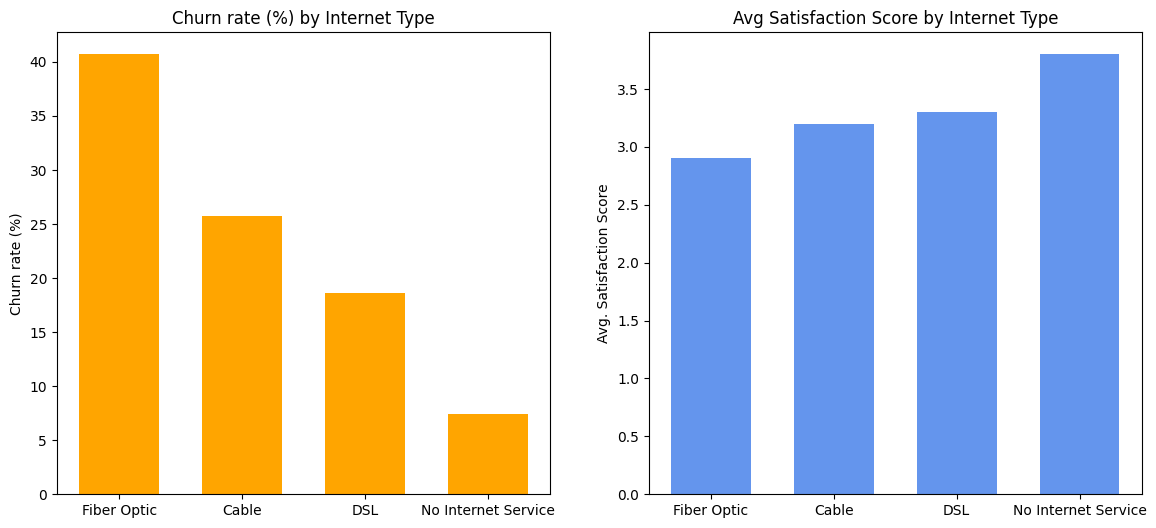

In [477]:
churn_rate_viz("Internet Type")

The analysis reveals that **fiber optic** users have the **highest churn rate (40.7%)** and the **lowest satisfaction score (2.9)**. Cable and DSL users experience lower churn rates (25.7% and 18.6%, respectively) and slightly higher satisfaction scores (3.2 and 3.3), indicating better retention and overall customer experience. **Customers without internet service report the highest satisfaction score (3.8) and the lowest churn rate (7.4%)**. These findings suggest that improving service quality and addressing pain points in fiber optic offerings could help reduce churn and enhance customer satisfaction.

##### b. Hypothesis Testing

- **Question**: Are customers who subscribed to an internet service more likely to churn compared to those who do not?
- **Grouping**:
    - 1: customers who **subscribed** to an internet service
    - 0: customers who did **not subscribe** to an internet service
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>0</sub>
    - H<sub>a</sub>: P<sub>1</sub> > P<sub>0</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test for proportions

In [478]:
# count the number of successes
counts = data.groupby('Internet Service')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Internet Service'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts, nobs, alternative = "larger")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Internet Service
Yes    1756
No      113
Name: Churn Value, dtype: int64

The number of observations in each group:
Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

Z-statistics: 19.13
p-value: 0.0


Now we would like to get a 99% confidence interval for P<sub>1</sub> - P<sub>0</sub>

In [479]:
# The number of successes for group 1
p1_hat = data[data['Internet Service']=='Yes']['Churn Value'].sum()/len(data[data['Internet Service']=='Yes'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['Internet Service']=='Yes'])

# The number of successes for group 0
p0_hat =  data[data['Internet Service']=='No']['Churn Value'].sum()/len(data[data['Internet Service']=='No'])
q0_hat = 1 - p0_hat 

# The sample size of group 0
n0 = len(data[data['Internet Service']=='No'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p0_hat*q0_hat/n0)

upper_bound = (p1_hat - p0_hat) + z_99*se
lower_bound = (p1_hat - p0_hat) - z_99*se
print("99% Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

99% Confidence interval: (0.22, 0.27)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who subscribe to an internet service **is larger** than those who do not subscribe.

- **99% confidence interval for (P<sub>1</sub> - P<sub>0</sub>)**: (0.22, 0.27)

### Question 2: How Do Churn Rates Vary by Payment Method: Bank Withdrawal, Credit Card, or Mailed Check?

##### a. Exploratory Data Analysis

Churn Rate by Payment Method
Payment Method
Mailed Check       36.9
Bank Withdrawal    34.0
Credit Card        14.5
dtype: float64

Satisfaction Score by Payment Method
Payment Method
Mailed Check       3.0
Bank Withdrawal    3.1
Credit Card        3.5
Name: Satisfaction Score, dtype: float64


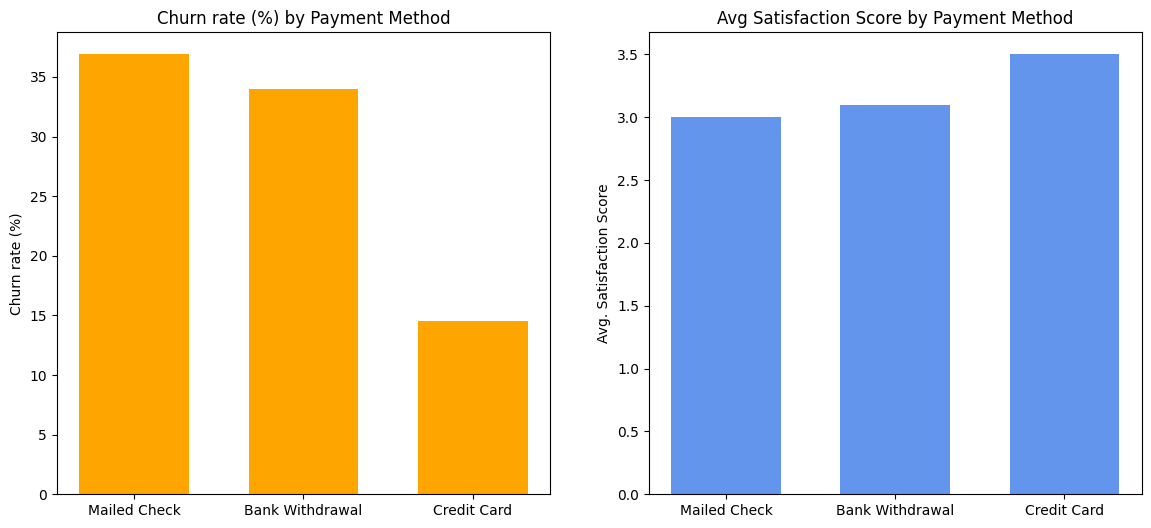

In [480]:
churn_rate_viz('Payment Method')

The analysis shows that customers using **Mailed Checks and Bank Withdrawals have higher churn rates (36.9% and 34.0%, respectively) and lower satisfaction scores (3.0 and 3.1)**, suggesting possible inconvenience or dissatisfaction with these payment methods. In contrast, **Credit Card users exhibit the lowest churn rate (14.5%) and the highest satisfaction score (3.5)**, indicating a smoother, more preferred payment experience. These findings suggest that promoting automated and seamless payment options like credit cards may help improve retention and customer satisfaction.

##### b. Hypothesis Testing

- **Question**: Are customers who pay by either mailed check or bank withdrawal are more likely to churn compared to those who pay by credit card.

- **Grouping**:
    - 1: customers who pay by either **mailed check or bank withdrawal**
    - 2: customers who pay by **credit card**
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>2</sub>
    - H<sub>a</sub>: P<sub>1</sub> > P<sub>2</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test

In [481]:
# Create a new column 'payment_method_combined' to group 'Mailed Check' and 'Bank Withdrawal' into one bucket
data['payment_method_combined'] = 'Credit Card'
data.loc[data['Payment Method'].isin(['Mailed Check', 'Bank Withdrawal']), 'payment_method_combined'] = 'Mailed Check + Bank Withdrawal'

In [482]:
# count the number of successes
counts = data.groupby('payment_method_combined')['Churn Value'].sum().sort_values(ascending=False)

# count the number of observations in each group
nobs= data['payment_method_combined'].value_counts().sort_values(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts, nobs, alternative = "larger")
print("Z-statistics:", z_stat)
print("p-value:", p_value.round(5))

The number of successes in each sample:
payment_method_combined
Mailed Check + Bank Withdrawal    1471
Credit Card                        398
Name: Churn Value, dtype: int64

The number of observations in each group:
payment_method_combined
Mailed Check + Bank Withdrawal    4294
Credit Card                       2749
Name: count, dtype: int64

Z-statistics: 18.33944284624308
p-value: 0.0


Now we would like to get a 99% confidence interval for the group P<sub>1</sub> - P<sub>2</sub>

In [483]:
# The number of successes for group 1
p1_hat = data[data['payment_method_combined']=='Mailed Check + Bank Withdrawal']['Churn Value'].sum()/len(data[data['payment_method_combined']=='Mailed Check + Bank Withdrawal'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['payment_method_combined']=='Mailed Check + Bank Withdrawal'])

# The number of successes for group 2
p2_hat =  data[data['payment_method_combined']=='Credit Card']['Churn Value'].sum()/len(data[data['payment_method_combined']=='Credit Card'])
q2_hat = 1 - p2_hat 

# The sample size of group 2
n2 = len(data[data['payment_method_combined']=='Credit Card'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p2_hat*q2_hat/n2)

upper_bound = (p1_hat - p2_hat) + z_99*se
lower_bound = (p1_hat - p2_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (0.17, 0.22)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who pay by either mailed check or bank withdrawal **is larger** than those who pay by credit card.

- **99% confidence interval for (P<sub>1</sub> - P<sub>2</sub>)**: (0.17, 0.22)

### Question 3: How Do Churn Rates Vary Across Month-to-Month, One-Year, and Two-Year Contracts?

##### a. Exploratory Data Analysis

Churn Rate by Contract
Contract
Month-to-Month    45.8
One Year          10.7
Two Year           2.5
dtype: float64

Satisfaction Score by Contract
Contract
Month-to-Month    2.9
One Year          3.6
Two Year          3.7
Name: Satisfaction Score, dtype: float64


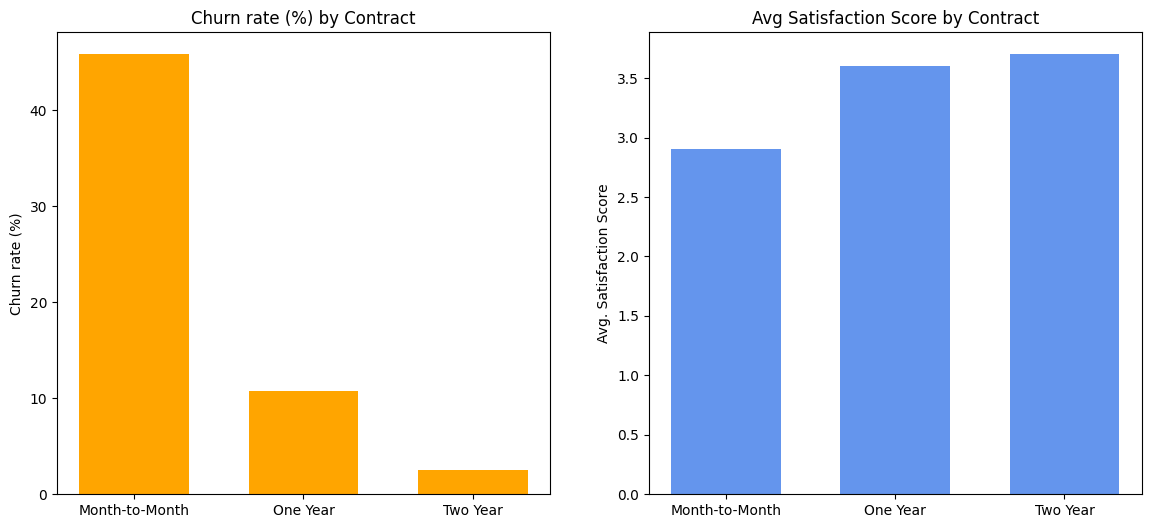

In [484]:
churn_rate_viz("Contract")

Customers on **Month-to-Month contracts** have the **highest churn rate (45.8%)** and the **lowest satisfaction score (2.9)**. In contrast, One-Year (10.7% churn, 3.6 satisfaction) and Two-Year (2.5% churn, 3.7 satisfaction) contracts show significantly lower churn rates and higher satisfaction, suggesting that long-term contracts indicate customer loyalty.

 ### Question 4: Do 'Premium Tech Support', 'Unlimited Data' and 'Online Backup' reduce customer churn?

#### i. Premium Tech Support

##### a. Exploratory Data Analysis

Churn Rate by Premium Tech Support
Premium Tech Support
No     31.2
Yes    15.2
dtype: float64

Satisfaction Score by Premium Tech Support
Premium Tech Support
No     3.2
Yes    3.3
Name: Satisfaction Score, dtype: float64


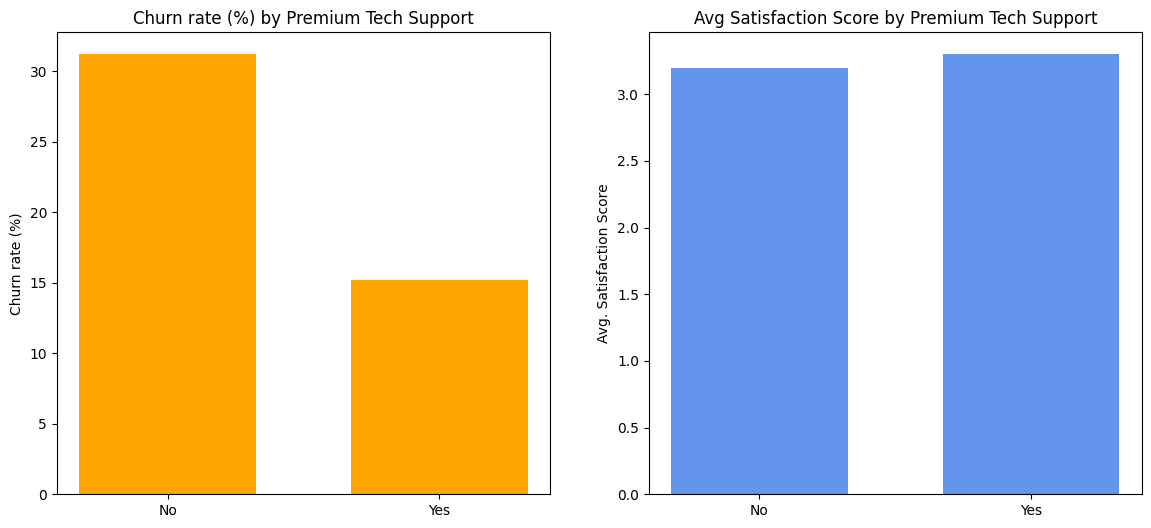

In [485]:
churn_rate_viz('Premium Tech Support')

**Customers subscribed to Premium Tech Support have a significantly lower churn rate (15.2%)** compared to those without it (31.2%). This suggests that access to premium technical support may improve customer retention. However, providing premium tech support does not improve customer satisfaction.

##### b. Hypothesis Testing

- **Question**: Are customers who subcribe to premium technical support less likely to churn compared to those who do not
- **Grouping**: 
    - 1: customers who **subcribed** to premium technical support
    - 0: customers who did **not subcribe** to premium technical support
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>0</sub>
    - H<sub>a</sub>: P<sub>1</sub> < P<sub>0</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test

In [486]:
# count the number of successes
counts = data.groupby('Premium Tech Support')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Premium Tech Support'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts, nobs, alternative = "smaller")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Premium Tech Support
Yes     310
No     1559
Name: Churn Value, dtype: int64

The number of observations in each group:
Premium Tech Support
Yes    2044
No     4999
Name: count, dtype: int64

Z-statistics: -13.82
p-value: 0.0


Now we would like to get a 99% confidence interval for P<sub>1</sub> - P<sub>0</sub>

In [487]:
#
p1_hat = data[data['Premium Tech Support']=='Yes']['Churn Value'].sum()/len(data[data['Premium Tech Support']=='Yes'])
q1_hat = 1 - p1_hat
n1 = len(data[data['Premium Tech Support']=='Yes'])

p0_hat =  data[data['Premium Tech Support']=='No']['Churn Value'].sum()/len(data[data['Premium Tech Support']=='No'])
q0_hat = 1 - p0_hat 
n0 = len(data[data['Premium Tech Support']=='No'])

z_99 =  2.5758
se = np.sqrt(p1_hat*q1_hat/n1 + p0_hat*q0_hat/n0)

upper_bound = (p1_hat - p0_hat) + z_99*se
lower_bound = (p1_hat - p0_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (-0.19, -0.13)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who subscribe to premium technical support **is smaller** than those who do not.

- **99% confidence interval for (p1 - p0)**: (-0.19, -0.13)

#### ii. Unlimited Data

##### a. Exploratory Data Analysis

Churn Rate by Unlimited Data
Unlimited Data
Yes    31.7
No     16.0
dtype: float64

Satisfaction Score by Unlimited Data
Unlimited Data
Yes    3.1
No     3.6
Name: Satisfaction Score, dtype: float64


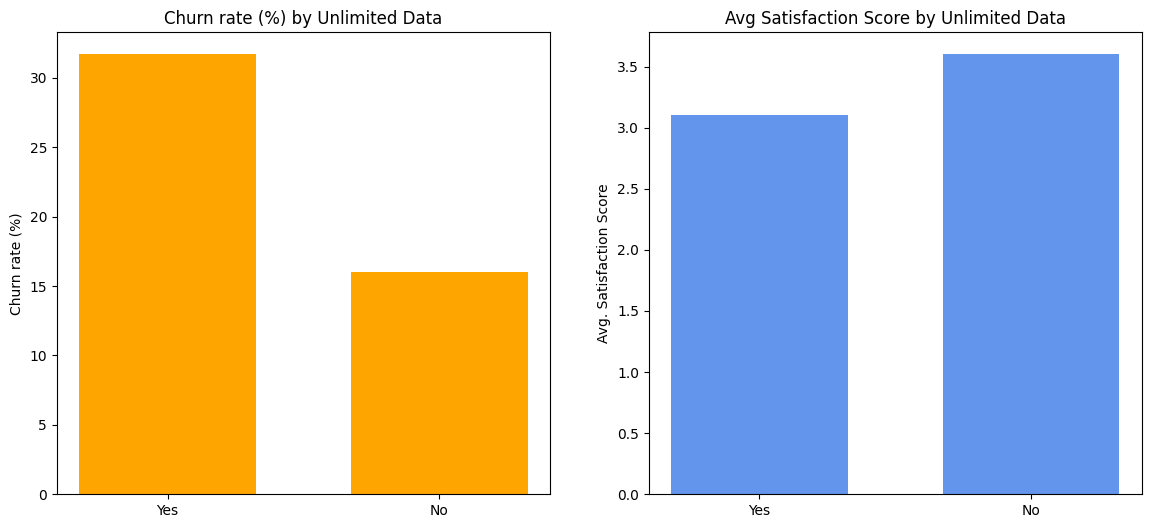

In [488]:
churn_rate_viz("Unlimited Data")

Customers with **Unlimited Data have a higher churn rate (31.7%)** compared to those without it (16.0%), suggesting that this service does not effectively retain users. Additionally, their **satisfaction score is lower** (3.1 vs. 3.6), indicating that Unlimited Data users may have higher expectations or experience issues that impact their overall satisfaction.

##### b. Hypothesis Testing

- **Question**: Are customers who pay an additional fee to have unlimited data downloads more likely to churn compared to those who do not?
- **Grouping**: 
    - 1: customers who **paid** an additional fee to have unlimited data downloads
    - 0: customers who did **not pay** an additional fee to have unlimited data downloads
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>0</sub>
    - H<sub>a</sub>: P<sub>1</sub> > P<sub>0</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test

In [489]:
# count the number of successes
counts = data.groupby('Unlimited Data')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Unlimited Data'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()
# Perform z-test
z_stat, p_value = proportions_ztest(counts.values, nobs.values, alternative = "larger")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Unlimited Data
Yes    1502
No      367
Name: Churn Value, dtype: int64

The number of observations in each group:
Unlimited Data
Yes    4745
No     2298
Name: count, dtype: int64

Z-statistics: 13.98
p-value: 0.0


In [490]:
# The number of successes for group 1
p1_hat = data[data['Unlimited Data']=='Yes']['Churn Value'].sum()/len(data[data['Unlimited Data']=='Yes'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['Unlimited Data']=='Yes'])

# The number of successes for group 0
p0_hat =  data[data['Unlimited Data']=='No']['Churn Value'].sum()/len(data[data['Unlimited Data']=='No'])
q0_hat = 1 - p0_hat 

# The sample size of group 0
n0 = len(data[data['Unlimited Data']=='No'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p0_hat*q0_hat/n0)

upper_bound = (p1_hat - p0_hat) + z_99*se
lower_bound = (p1_hat - p0_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (0.13, 0.18)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who pay an additional fee to have unlimited data downloads **is larger** than those who do not.

- **99% confidence interval for (P<sub>1</sub> - P<sub>0</sub>)**: (0.13, 0.18)

#### iii. Online Security

##### a. Exploratory Data Analysis

Churn Rate by Online Security
Online Security
No     31.3
Yes    14.6
dtype: float64

Satisfaction Score by Online Security
Online Security
No     3.3
Yes    3.1
Name: Satisfaction Score, dtype: float64


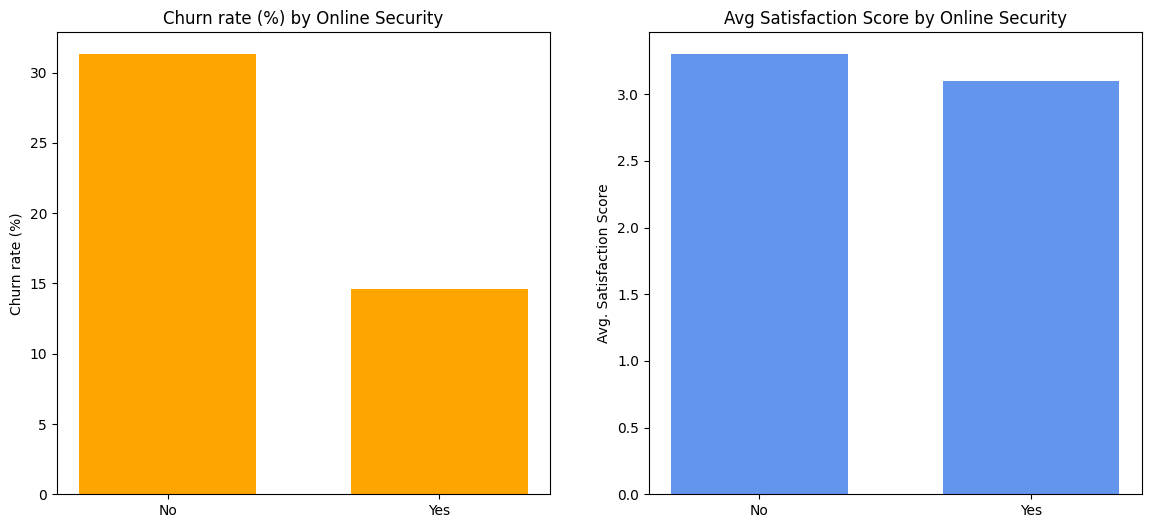

In [491]:
churn_rate_viz("Online Security")

Customers **with Online Security have a significantly lower churn rate (14.6%)** compared to those without it (31.3%), suggesting that this service may contribute to retention. **However, their satisfaction score** is slightly lower (3.1 vs. 3.3).

##### b. Hypothesis Testing

- **Question**: Are customers who subscribe to online security service less likely to churn compared to those who do not?
- **Grouping**: 
    - 1: customers who **subscribed** to an online security service 
    - 0: customers who did **not subscribe** to an online security service 
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>0</sub>
    - H<sub>a</sub>: P<sub>1</sub> < P<sub>0</sub>
- **Significance level**: &alpha; = 0.01

the code belowe will perform an z-test

In [492]:
# count the number of successes
counts = data.groupby('Online Security')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Online Security'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts.values, nobs.values, alternative = "smaller")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Online Security
Yes     295
No     1574
Name: Churn Value, dtype: int64

The number of observations in each group:
Online Security
Yes    2019
No     5024
Name: count, dtype: int64

Z-statistics: -14.37
p-value: 0.0


Now we would like to get a 99% confidence interval for P<sub>1</sub> - P<sub>0</sub>

In [493]:
# The number of successes for group 1
p1_hat = data[data['Online Security']=='Yes']['Churn Value'].sum()/len(data[data['Online Security']=='Yes'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['Online Security']=='Yes'])

# The number of successes for group 0
p0_hat =  data[data['Online Security']=='No']['Churn Value'].sum()/len(data[data['Online Security']=='No'])
q0_hat = 1 - p0_hat 

# The sample size of group 0
n0 = len(data[data['Online Security']=='No'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p0_hat*q0_hat/n0)

upper_bound = (p1_hat - p0_hat) + z_99*se
lower_bound = (p1_hat - p0_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (-0.19, -0.14)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who subsribe to an online security service **is smaller** than those who do not.

- **99% confidence interval for (P<sub>1</sub> - P<sub>0</sub>)**: (-0.19, -0.14)

## Churn Driver: Demographics

This section explores how churn rate differs among different customer segments.

### Question 1: Do churn rates differ across different age groups?

#### i. Exploratory Data Analysis

Churn Rate by Age Group
Age Group
Over 65     41.7
30-64       24.2
Under 30    21.7
dtype: float64

Satisfaction Score by Age Group
Age Group
Over 65     2.9
30-64       3.3
Under 30    3.3
Name: Satisfaction Score, dtype: float64


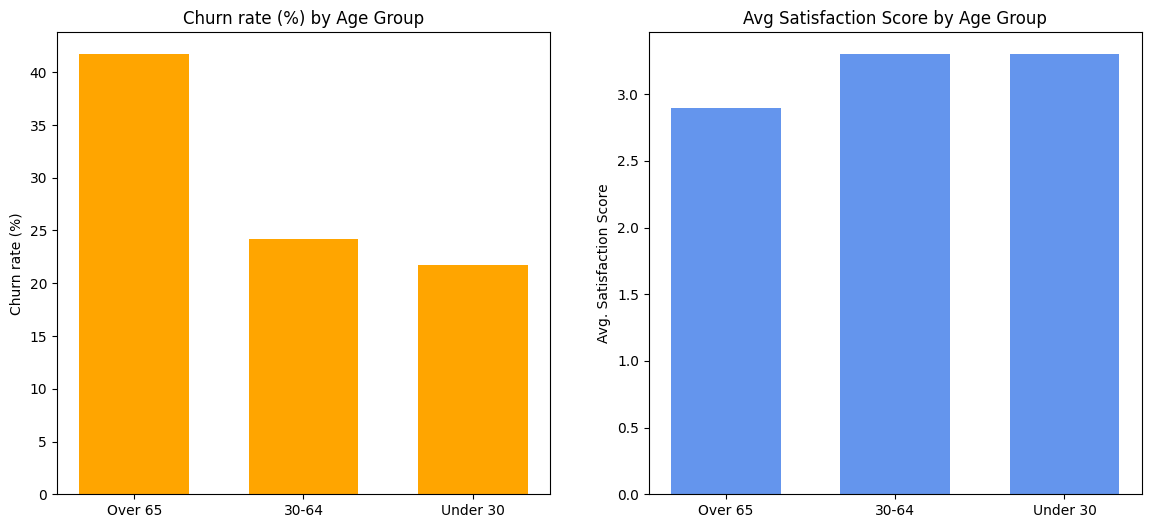

In [494]:
churn_rate_viz('Age Group')

**Customers over 65 exhibit a notably higher churn rate (41.7%) and lower satisfaction score (2.9)** compared to the 30–64 and Under 30 groups, which have churn rates around 21.7%–24.2% and satisfaction scores of 3.3. This suggests that older customers may be less satisfied.

#### ii. Hypothesis Testing

- **Question**: Are senior citizens (over 65 years old) more likely to churn compared to customers who are 65 years old or less?
- **Grouping**: 
    - 1: customers who age over 65
    - 2: customers are 65 or less
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>2</sub>
    - H<sub>a</sub>: P<sub>1</sub> > P<sub>2</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test

In [495]:
# count the number of successes
counts = data.groupby('Senior Citizen')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Senior Citizen'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts.values, nobs.values, alternative = "larger")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Senior Citizen
Yes     476
No     1393
Name: Churn Value, dtype: int64

The number of observations in each group:
Senior Citizen
Yes    1142
No     5901
Name: count, dtype: int64

Z-statistics: 12.66
p-value: 0.0


Now we would like to get a 99% confidence interval for P<sub>1</sub> - P<sub>2</sub>

In [496]:
# The number of successes for group 1
p1_hat = data[data['Senior Citizen']=='Yes']['Churn Value'].sum()/len(data[data['Senior Citizen']=='Yes'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['Senior Citizen']=='Yes'])

# The number of successes for group 0
p2_hat =  data[data['Senior Citizen']=='No']['Churn Value'].sum()/len(data[data['Senior Citizen']=='No'])
q2_hat = 1 - p2_hat 

# The sample size of group 0
n2 = len(data[data['Senior Citizen']=='No'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p2_hat*q2_hat/n2)

upper_bound = (p1_hat - p2_hat) + z_99*se
lower_bound = (p1_hat - p2_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (0.14, 0.22)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among those who age over 65 years old **is larger** than those who are 65 or less.

- **99% confidence interval for (P<sub>1</sub> - P<sub>2</sub>)**: (0.14, 0.22)

### Question 2: Are married customers more likely to churn compared to single customers?

### i. Exploratory Data Analysis

Churn Rate by Marital Status
Marital Status
Single     33.0
Married    19.7
dtype: float64

Satisfaction Score by Marital Status
Marital Status
Single     3.2
Married    3.3
Name: Satisfaction Score, dtype: float64


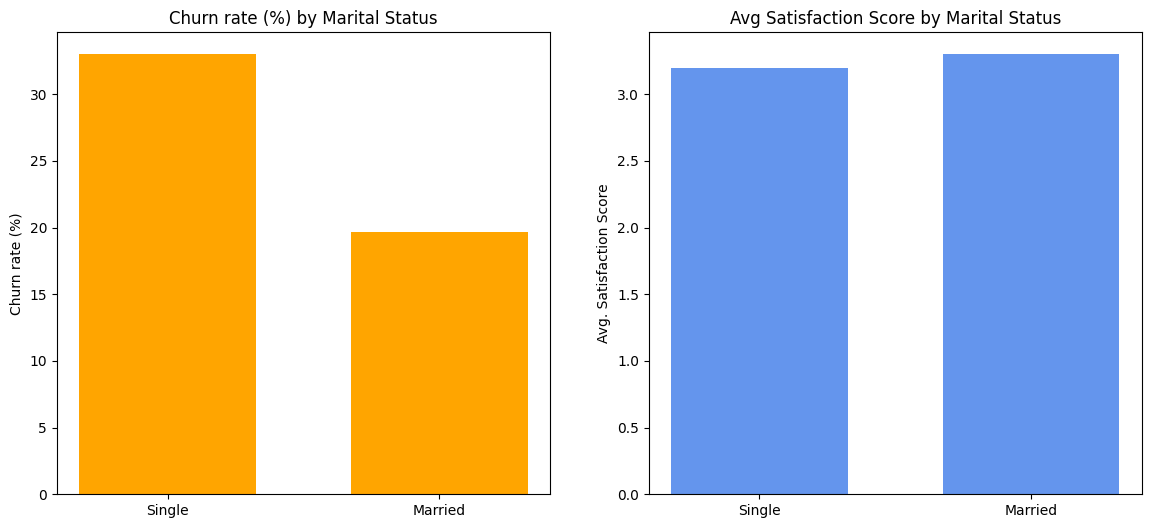

In [497]:
churn_rate_viz('Marital Status')

**Married customers have a lower churn rate (19.7%)** and slightly higher satisfaction (3.3) compared to single customers (33.0% churn, 3.2 satisfaction), suggesting marital status may influence customer retention.

### ii. Hypothesis Testing

- **Question**: Are single customers more like to churn compared to married customers?
- **Grouping**: 
    - 1: single customers
    - 2: married customers
- **Hypotheses**:
    - H<sub>0</sub>: P<sub>1</sub> = P<sub>2</sub>
    - H<sub>a</sub>: P<sub>1</sub> > P<sub>2</sub>
- **Significance level**: &alpha; = 0.01

The code below will perform a z-test

In [498]:
# count the number of successes
counts = data.groupby('Marital Status')['Churn Value'].sum().sort_index(ascending=False)

# count the number of observations in each group
nobs= data['Marital Status'].value_counts().sort_index(ascending=False)

# print the parameters
print("The number of successes in each sample:")
print(counts)
print()
print("The number of observations in each group:")
print(nobs)
print()

# Perform z-test
z_stat, p_value = proportions_ztest(counts.values, nobs.values, alternative = "larger")
print("Z-statistics:", z_stat.round(2))
print("p-value:", p_value.round(5))

The number of successes in each sample:
Marital Status
Single     1200
Married     669
Name: Churn Value, dtype: int64

The number of observations in each group:
Marital Status
Single     3641
Married    3402
Name: count, dtype: int64

Z-statistics: 12.63
p-value: 0.0


Now we would like to get a 99% confidence interval for P<sub>1</sub> - P<sub>2</sub>

In [499]:
# The number of successes for group 1
p1_hat = data[data['Marital Status']=='Single']['Churn Value'].sum()/len(data[data['Marital Status']=='Single'])
q1_hat = 1 - p1_hat

# The sample size of group 1
n1 = len(data[data['Marital Status']=='Single'])

# The number of successes for group 2
p2_hat =  data[data['Marital Status']=='Married']['Churn Value'].sum()/len(data[data['Marital Status']=='Married'])
q2_hat = 1 - p2_hat 

# The sample size of group 2
n2 = len(data[data['Marital Status']=='Married'])

# The Z-score for 99% confidence interval
z_99 =  2.5758

# Standard error
se = np.sqrt(p1_hat*q1_hat/n1 + p2_hat*q2_hat/n2)

upper_bound = (p1_hat - p2_hat) + z_99*se
lower_bound = (p1_hat - p2_hat) - z_99*se
print("Confidence interval:", f"({lower_bound:.2f}, {upper_bound:.2f})")

Confidence interval: (0.11, 0.16)


- **Decision**: there is **sufficient evidence** at the 1% level of significance to conclude that the proportion of churned customers among single **is larger** than married customers.

- **99% confidence interval for (P<sub>1</sub> - P<sub>2</sub>)**: (0.11, 0.16)